In [98]:
path = "../data/"
csvfile = "Gmarina_antibiotics_filtrate_experiment_round2_results_Fig4.csv"

#import pandas
import pandas as pd
# import matplotlib
import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline
df = pd.read_csv(path+csvfile)
print(df)
df.head()
df.info()

           Date                      Species Treatment Abbreviation  \
0    13/12/2022  Grammatophora_marina_1027/1        na        G.mar   
1    13/12/2022  Grammatophora_marina_1027/1        na        G.mar   
2    13/12/2022  Grammatophora_marina_1027/1        na        G.mar   
3    13/12/2022  Grammatophora_marina_1027/1        na        G.mar   
4    13/12/2022  Grammatophora_marina_1027/1        na        G.mar   
..          ...                          ...       ...          ...   
103  13/12/2022  Grammatophora_marina_1027/1      EtOH   G.mar_EtOH   
104  13/12/2022  Grammatophora_marina_1027/1      EtOH   G.mar_EtOH   
105  13/12/2022  Grammatophora_marina_1027/1      EtOH   G.mar_EtOH   
106  13/12/2022  Grammatophora_marina_1027/1      EtOH   G.mar_EtOH   
107  13/12/2022  Grammatophora_marina_1027/1      EtOH   G.mar_EtOH   

     #_coverslip  #_crawl  #_swim  #_dead  Time after induction (h)  Age (dpf)  
0              9        2      13       6                        2

In [99]:
# Create an additional column '%_settlement_total' after converting the existing '%_coverslip' column into a percentage of total larvae (assumed 30 larvae/sample).
#also same for 48h, and % alive as well.  
# create a new column
df['%_settlement_total'] = df['#_coverslip'] / 30.0 * 100
df['%_settlement_alive'] = (df['#_coverslip'] / (30.0 - df['#_dead'])) * 100
  
# Print the DataFrame after 
# addition of new column
print(df)
df.head()
df.info()

           Date                      Species Treatment Abbreviation  \
0    13/12/2022  Grammatophora_marina_1027/1        na        G.mar   
1    13/12/2022  Grammatophora_marina_1027/1        na        G.mar   
2    13/12/2022  Grammatophora_marina_1027/1        na        G.mar   
3    13/12/2022  Grammatophora_marina_1027/1        na        G.mar   
4    13/12/2022  Grammatophora_marina_1027/1        na        G.mar   
..          ...                          ...       ...          ...   
103  13/12/2022  Grammatophora_marina_1027/1      EtOH   G.mar_EtOH   
104  13/12/2022  Grammatophora_marina_1027/1      EtOH   G.mar_EtOH   
105  13/12/2022  Grammatophora_marina_1027/1      EtOH   G.mar_EtOH   
106  13/12/2022  Grammatophora_marina_1027/1      EtOH   G.mar_EtOH   
107  13/12/2022  Grammatophora_marina_1027/1      EtOH   G.mar_EtOH   

     #_coverslip  #_crawl  #_swim  #_dead  Time after induction (h)  \
0              9        2      13       6                        24   
1    

In [100]:
#make a subset of df where time=24 h after induction
subset24 = df.loc[df["Time after induction (h)"]==24]

#make a subset of df where time=48 h after induction
subset48 = df.loc[df["Time after induction (h)"]==48]

In [101]:
#Run a Shapiro-Wilks test on data to check distribution
#import libraries needed
import numpy as np
from scipy.stats import shapiro
from numpy.random import random

#Conduct the Shapiro-Wilk Test
shapiroresult24 = shapiro(subset24["%_settlement_alive"])
#The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05. We can state with 95% confidence that the data does NOT fit the normal distribution.

#Conduct the Shapiro-Wilk Test
shapiroresult48 = shapiro(subset48["%_settlement_alive"])

print(shapiroresult24)
print(shapiroresult48)

ShapiroResult(statistic=0.9557579755783081, pvalue=0.04457047954201698)
ShapiroResult(statistic=0.8769850730895996, pvalue=4.9973383283941075e-05)


In [102]:
#We want to know if each type for biofilm used causes significantly more settlement than control, after 24 and 48h.
#We will do Mann-Whitney U rank test on each treatment vs control to check for p-value <0.05, at 24 and 48h.

from scipy import stats

#test subsetting the data correctly for 24h control and other treatments
print(df["%_settlement_alive"][(df['Time after induction (h)']==24) & (df['Abbreviation'] == "Control_slip")])
print(np.unique(df['Abbreviation']))

#make a dictionary called 'p-values' and output into it the results of a Mann-Whitney U test on each treatment vs control, 24h
p_values= {}
ctrl_data = df["%_settlement_alive"][(df['Time after induction (h)']==24) & (df['Abbreviation'] == "nbc")]
for treatment in np.unique(df['Abbreviation']):
    test_data = df["%_settlement_alive"][(df['Time after induction (h)']==24) & (df['Abbreviation'] == treatment)]
    print(treatment)
    res = stats.mannwhitneyu(ctrl_data, test_data)
    print(res)
    p_values[treatment] = res[1]

#make a dictionary called 'p-values48' and output into it the results of a Mann-Whitney U test on each treatment vs control, 48h
p_values48= {}
ctrl_data48 = df["%_settlement_alive"][(df['Time after induction (h)']==48) & (df['Abbreviation'] == "nbc")]
for treatment in np.unique(df['Abbreviation']):
    test_data48 = df["%_settlement_alive"][(df['Time after induction (h)']==48) & (df['Abbreviation'] == treatment)]
    print(treatment)
    res48 = stats.mannwhitneyu(ctrl_data48, test_data48)
    print(res48)
    p_values48[treatment] = res48[1]
    
#combine the two dictionaries for 24 and 48h into one dictionary
def mergeDictionary(p_values, p_values48):
   dict_both = {**p_values, **p_values48}
   for key, value in dict_both.items():
       if key in p_values and key in p_values48:
               dict_both[key] = [value , p_values[key]]
   return dict_both

dict_both = mergeDictionary(p_values, p_values48)
print(dict_both)

#make a dataframe from this dictionary
MW_results = pd.DataFrame.from_dict(dict_both, orient='index',
                       columns=['24h p-value', '48h p-value'])
MW_results_sorted = MW_results.sort_values(by='48h p-value', ascending=False)
MWresults_html = MW_results_sorted.style.set_caption('Table S1. Mann-Whitney U rank test p-values for differently treated G. marina cues vs negative control')

#Save to file
MW_results_sorted.to_csv("../output/SuppTable_for_fig4a.csv")
MWresults_html.to_html("../output/SuppTable_for_fig4a.html")


Series([], Name: %_settlement_alive, dtype: float64)
['G.mar' 'G.mar_50C' 'G.mar_EtOH' 'G.mar_ab1' 'G.mar_ab2' 'G.mar_boil'
 'G.mar_dry' 'G.mar_fil' 'nbc']
G.mar
MannwhitneyuResult(statistic=0.0, pvalue=0.004998124765082457)
G.mar_50C
MannwhitneyuResult(statistic=2.0, pvalue=0.012591911490379705)
G.mar_EtOH
MannwhitneyuResult(statistic=10.5, pvalue=0.2598175080058419)
G.mar_ab1
MannwhitneyuResult(statistic=0.0, pvalue=0.004998124765082457)
G.mar_ab2
MannwhitneyuResult(statistic=0.0, pvalue=0.0048466012104884885)
G.mar_boil
MannwhitneyuResult(statistic=6.0, pvalue=0.06508095865779158)
G.mar_dry
MannwhitneyuResult(statistic=1.0, pvalue=0.008015850513029913)
G.mar_fil
MannwhitneyuResult(statistic=19.0, pvalue=0.9356222819645424)
nbc
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
G.mar
MannwhitneyuResult(statistic=0.0, pvalue=0.004998124765082457)
G.mar_50C
MannwhitneyuResult(statistic=4.0, pvalue=0.03034794173956043)
G.mar_EtOH
MannwhitneyuResult(statistic=3.5, pvalue=0.024469650576986687

In [103]:
#do Kruskal-Wallis Test to check if significant difference between different groups at timepoint 24hpf.. Shapiro-Wilks test suggests data is not normally distributed.
#We are interest in 'Abbreviation', We will compare the G. marina biofilms treated in different ways.  
import scipy.stats as stats

kruskalgroup=stats.kruskal(subset24["%_settlement_alive"][subset24["Abbreviation"] == "nbc"],
               subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_50C"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_fil"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_dry"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_boil"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_ab1"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_ab2"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_EtOH"])
print(kruskalgroup)

#perform Dunn's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp

datagroup = [subset24["%_settlement_alive"][subset24["Abbreviation"] == "nbc"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_50C"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_fil"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_dry"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_boil"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_ab1"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_ab2"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "G.mar_EtOH"]]

p_values = sp.posthoc_dunn(datagroup, p_adjust = 'bonferroni')
print(p_values)

p_values < 0.00625

#KruskalResult(statistic=35.626126813390755, pvalue=2.0554511402842857e-05)
#results shows biofilm chemistry is important for settlement at 24h,
#nothing signifantly different than control using Bonferroni correction.
#indicates bacterial component of this biofilm not contributing to the induction effect.

KruskalResult(statistic=35.626126813390755, pvalue=2.0554511402842857e-05)
          1         2    3         4         5         6         7         8  \
1  1.000000  0.080692  1.0  1.000000  0.138237  1.000000  0.005027  0.008089   
2  0.080692  1.000000  1.0  0.112464  1.000000  1.000000  1.000000  1.000000   
3  1.000000  1.000000  1.0  1.000000  1.000000  1.000000  1.000000  1.000000   
4  1.000000  0.112464  1.0  1.000000  0.189711  1.000000  0.007525  0.011971   
5  0.138237  1.000000  1.0  0.189711  1.000000  1.000000  1.000000  1.000000   
6  1.000000  1.000000  1.0  1.000000  1.000000  1.000000  0.407028  0.568377   
7  0.005027  1.000000  1.0  0.007525  1.000000  0.407028  1.000000  1.000000   
8  0.008089  1.000000  1.0  0.011971  1.000000  0.568377  1.000000  1.000000   
9  1.000000  0.676699  1.0  1.000000  1.000000  1.000000  0.069172  0.102825   

          9  
1  1.000000  
2  0.676699  
3  1.000000  
4  1.000000  
5  1.000000  
6  1.000000  
7  0.069172  
8  0.102825 

,1,2,3,4,5,6,7,8,9
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [104]:
#do Kruskal-Wallis Test to check if significant difference between different groups at timepoint 48hpf.. Shapiro-Wilks test suggests data is not normally distributed.
#We are interested in 'Abbreviation', We will compare the G. marina biofilms treated in different ways.  
import scipy.stats as stats

kruskalgroup48=stats.kruskal(subset48["%_settlement_alive"][subset48["Abbreviation"] == "nbc"],
               subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_50C"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_fil"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_dry"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_boil"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_ab1"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_ab2"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_EtOH"])
print(kruskalgroup48)

#perform Dunn's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp

datagroup48 = [subset48["%_settlement_alive"][subset48["Abbreviation"] == "nbc"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_50C"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_fil"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_dry"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_boil"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_ab1"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_ab2"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "G.mar_EtOH"]]

p_values48 = sp.posthoc_dunn(datagroup48, p_adjust = 'bonferroni')
print(p_values48)

p_values48 < 0.00625

#KruskalResult(statistic=(statistic=44.28898680094602, pvalue=5.017133285351415e-07)
#results shows biofilm chemistry is important for settlement at 48h,
#only antibiotic-treated and untreated G.marina significantly greater than control and filtrate.
#indicates bacterial component of this biofilm not contributing to the induction effect.

KruskalResult(statistic=44.28898680094602, pvalue=5.017133285351415e-07)
          1         2         3         4         5         6         7  \
1  1.000000  0.008379  1.000000  1.000000  1.000000  1.000000  0.002353   
2  0.008379  1.000000  1.000000  0.000803  0.159733  1.000000  1.000000   
3  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.451510   
4  1.000000  0.000803  1.000000  1.000000  1.000000  1.000000  0.000191   
5  1.000000  0.159733  1.000000  1.000000  1.000000  1.000000  0.057314   
6  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.582633   
7  0.002353  1.000000  0.451510  0.000191  0.057314  0.582633  1.000000   
8  0.005612  1.000000  0.802387  0.000510  0.115792  1.000000  1.000000   
9  1.000000  1.000000  1.000000  0.841921  1.000000  1.000000  0.802387   

          8         9  
1  0.005612  1.000000  
2  1.000000  1.000000  
3  0.802387  1.000000  
4  0.000510  0.841921  
5  0.115792  1.000000  
6  1.000000  1.000000  
7  1.000

,1,2,3,4,5,6,7,8,9
1,False,False,False,False,False,False,True,True,False
2,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,True,False,False,True,False,False,False,False,False
8,True,False,False,True,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [105]:
#From the 24h dataset, use both the Mann-Whitney U rank test, and the median
#% settlement to generate an order of species ("Abbreviation") for the
#subsequent graphs that will be made for Figure 2.
#This will also allow us to generate a conditional colour palette for graphs, based on p-values
#of the Mann-Whitney U-rank test.

#make a dictionary called 'p-values' and output into it the results of a Mann-Whitney U test on each treatment vs control, 24h
p_values24_abb= {}
ctrl_data = df["%_settlement_alive"][(df['Time after induction (h)']==24) & (df['Abbreviation'] == "nbc")]
for treatment in np.unique(df['Abbreviation']):
    test_data = df["%_settlement_alive"][(df['Time after induction (h)']==24) & (df['Abbreviation'] == treatment)]
    print(treatment)
    res = stats.mannwhitneyu(ctrl_data, test_data)
    print(res)
#Make sure the p-values are considered only up to 6 decimal places, so that p-values + median will make the
#correct ordering
    p_values24_abb[treatment] = round(res[1], 6)

print(p_values24_abb.keys())

#make a dataframe from this dictionary
#make a dataframe with median values for each 'Abbreviation' group (ie each species median % settlement)
median_vals = df[df["Time after induction (h)"] == 24].groupby("Abbreviation")["%_settlement_alive"].median()
#make a dataframe with 'Abbreviation', '24h p-value', 'Median' from % settlement alive at 24h data
dftest = pd.DataFrame(list(zip(p_values24_abb.keys(), p_values24_abb.values(), median_vals)),
                      columns =['Abbreviation', '24h p-value', 'Median'])
print(dftest)


#generate a colour palette to colour graphs depending on p-value of Mann Whitney U test at 24h % settlement             
custom_palette = []
for value in dftest['24h p-value']:
    if value < 0.00625:
        custom_palette.append('steelblue')
    elif (value > 0.00625) and (value < 0.05):
        custom_palette.append('lightblue')
    else:
        custom_palette.append('whitesmoke')
print(custom_palette)
print(dftest['Abbreviation'])

dictionary = dict(zip(dftest["Abbreviation"], custom_palette))
print(dictionary)

G.mar
MannwhitneyuResult(statistic=0.0, pvalue=0.004998124765082457)
G.mar_50C
MannwhitneyuResult(statistic=2.0, pvalue=0.012591911490379705)
G.mar_EtOH
MannwhitneyuResult(statistic=10.5, pvalue=0.2598175080058419)
G.mar_ab1
MannwhitneyuResult(statistic=0.0, pvalue=0.004998124765082457)
G.mar_ab2
MannwhitneyuResult(statistic=0.0, pvalue=0.0048466012104884885)
G.mar_boil
MannwhitneyuResult(statistic=6.0, pvalue=0.06508095865779158)
G.mar_dry
MannwhitneyuResult(statistic=1.0, pvalue=0.008015850513029913)
G.mar_fil
MannwhitneyuResult(statistic=19.0, pvalue=0.9356222819645424)
nbc
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
dict_keys(['G.mar', 'G.mar_50C', 'G.mar_EtOH', 'G.mar_ab1', 'G.mar_ab2', 'G.mar_boil', 'G.mar_dry', 'G.mar_fil', 'nbc'])
  Abbreviation  24h p-value     Median
0        G.mar     0.004998  37.268519
1    G.mar_50C     0.012592  26.928571
2   G.mar_EtOH     0.259818  10.529557
3    G.mar_ab1     0.004998  49.936143
4    G.mar_ab2     0.004847  42.118227
5   G.mar_boil

In [106]:
#Order them by p-value+median % settlement at 24h
newranks = dftest.sort_values(['24h p-value', 'Median'],
              ascending = [False, True])
print(newranks)

  Abbreviation  24h p-value     Median
8          nbc     1.000000   6.083333
7    G.mar_fil     0.935622   5.489418
2   G.mar_EtOH     0.259818  10.529557
5   G.mar_boil     0.065081  21.328225
1    G.mar_50C     0.012592  26.928571
6    G.mar_dry     0.008016  42.857143
0        G.mar     0.004998  37.268519
3    G.mar_ab1     0.004998  49.936143
4    G.mar_ab2     0.004847  42.118227


In [107]:
#From the 48h dataset, we will generate a conditional colour palette for graphs, based on p-values
#of the Mann-Whitney U-rank test.

#make a dictionary called 'p-values' and output into it the results of a Mann-Whitney U test on each treatment vs control, 48h
p_values48_abb= {}
ctrl_data48 = df["%_settlement_alive"][(df['Time after induction (h)']==48) & (df['Abbreviation'] == "nbc")]
for treatment in np.unique(df['Abbreviation']):
    test_data48 = df["%_settlement_alive"][(df['Time after induction (h)']==48) & (df['Abbreviation'] == treatment)]
    print(treatment)
    res48 = stats.mannwhitneyu(ctrl_data48, test_data48)
    print(res48)
#Make sure the p-values are considered only up to 6 decimal places, so that p-values + median will make the
#correct ordering
    p_values48_abb[treatment] = round(res48[1], 6)

print(p_values48_abb.keys())

#make a dataframe from this dictionary
#make a dataframe with median values for each 'Abbreviation' group (ie each species median % settlement)
median_vals48 = df[df["Time after induction (h)"] == 48].groupby("Abbreviation")["%_settlement_alive"].median()
#make a dataframe with 'Abbreviation', '48h p-value', 'Median' from % settlement alive at 48h data
dftest48 = pd.DataFrame(list(zip(p_values48_abb.keys(), p_values48_abb.values(), median_vals48)),
                      columns =['Abbreviation', '48h p-value', 'Median'])
print(dftest48)


#generate a colour palette to colour graphs depending on p-value of Mann Whitney U test at 24h % settlement             
custom_palette48 = []
for value in dftest48['48h p-value']:
    if value < 0.00625:
        custom_palette48.append('steelblue')
    elif (value > 0.00625) and (value < 0.05):
        custom_palette48.append('lightblue')
    else:
        custom_palette48.append('whitesmoke')
print(custom_palette48)
print(dftest48['Abbreviation'])

dictionary48 = dict(zip(dftest48["Abbreviation"], custom_palette48))
print(dictionary48)

G.mar
MannwhitneyuResult(statistic=0.0, pvalue=0.004998124765082457)
G.mar_50C
MannwhitneyuResult(statistic=4.0, pvalue=0.03034794173956043)
G.mar_EtOH
MannwhitneyuResult(statistic=3.5, pvalue=0.024469650576986687)
G.mar_ab1
MannwhitneyuResult(statistic=0.0, pvalue=0.004998124765082457)
G.mar_ab2
MannwhitneyuResult(statistic=0.0, pvalue=0.004998124765082457)
G.mar_boil
MannwhitneyuResult(statistic=1.0, pvalue=0.008015850513029913)
G.mar_dry
MannwhitneyuResult(statistic=10.5, pvalue=0.2606581238113129)
G.mar_fil
MannwhitneyuResult(statistic=25.0, pvalue=0.2884874633234892)
nbc
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
dict_keys(['G.mar', 'G.mar_50C', 'G.mar_EtOH', 'G.mar_ab1', 'G.mar_ab2', 'G.mar_boil', 'G.mar_dry', 'G.mar_fil', 'nbc'])
  Abbreviation  48h p-value     Median
0        G.mar     0.004998  67.948718
1    G.mar_50C     0.030348  22.578348
2   G.mar_EtOH     0.024470  22.783251
3    G.mar_ab1     0.004998  75.369458
4    G.mar_ab2     0.004998  72.685185
5   G.mar_boil 

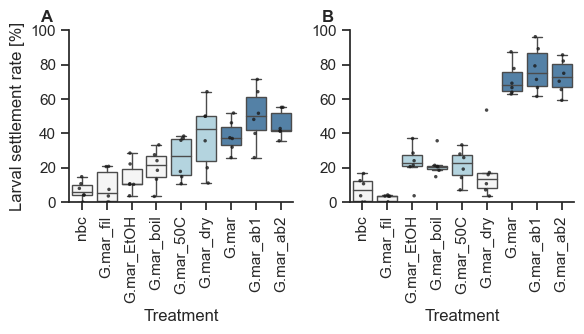

In [108]:
#Now we can make plots for % settlement alive at 24h and 48h,and length at 11 days.

#Order them by p-value+median % settlement at 24h
#newranks = dftest.sort_values(['24h p-value', 'Median'],
#              ascending = [False, True])

#Colour them according to p-value from Mann-Whitney U-test

fig, axes = plt.subplots(1, 2, figsize=(6, 3.5))
sns.set_style('ticks')
sns.despine()


#% settlement alive at 24h after induction
plot1 = sns.boxplot(ax=axes[0], data=subset24, x="Abbreviation", y="%_settlement_alive", 
                    order=newranks["Abbreviation"], 
                    linewidth=1.0, 
                    #color="whitesmoke", 
                    fliersize=0, palette=dictionary)
plot1 = sns.stripplot(ax=axes[0], data=subset24, x='Abbreviation', y="%_settlement_alive", jitter=True, dodge=True, 
                      marker='o', alpha=0.8, size=2.5, 
                      order=newranks["Abbreviation"], 
                      color="k")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
plot1.set_ylabel("Larval settlement rate [%]")
plot1.set(xlabel="Treatment")
plot1.set_ylim(0, 100)
plot1.set_title('A', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(-0.1,0)})

#% settlement alive at 48h after induction
plot2 = sns.boxplot(ax=axes[1], data=subset48, x="Abbreviation", y="%_settlement_alive", 
                    order=newranks["Abbreviation"], linewidth=1.0, fliersize=0, palette=dictionary48)
plot2 = sns.stripplot(ax=axes[1], data=subset48, x='Abbreviation', y="%_settlement_alive", order=newranks["Abbreviation"], jitter=True, dodge=True, marker='o', alpha=0.8, size=2.5, color="k")
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90)
plot2.set(ylabel=None)
plot2.set_ylim(0, 100)
plot2.set(xlabel="Treatment")
plt.tight_layout()
plot2.set_title('B', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(-0.1,0)})


plt.tight_layout()


#Export graph to svg file
plt.savefig("../output/Figure4.svg", bbox_inches='tight')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      108 non-null    object 
 1   Species                   108 non-null    object 
 2   Treatment                 108 non-null    object 
 3   Abbreviation              108 non-null    object 
 4   #_coverslip               108 non-null    int64  
 5   #_crawl                   108 non-null    int64  
 6   #_swim                    108 non-null    int64  
 7   #_dead                    108 non-null    int64  
 8   Time after induction (h)  108 non-null    int64  
 9   Age (dpf)                 108 non-null    int64  
 10  %_settlement_total        108 non-null    float64
 11  %_settlement_alive        108 non-null    float64
 12  %_dead                    108 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 11.1+ KB


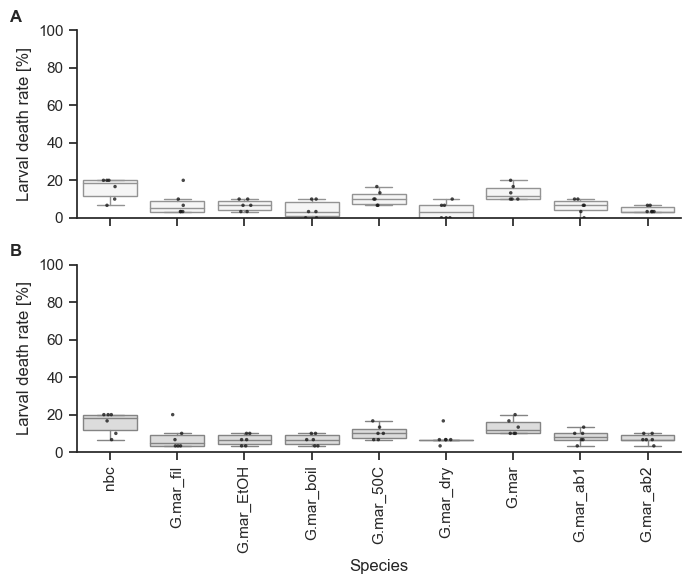

In [109]:
#Add a column to dataframe for % dead larvae and plot this across species
df['%_dead'] = df['#_dead'] / 30 * 100
df.info()

#Make a neutral palette
# color palette as dictionary
mypalette = {24:"whitesmoke", 48:"gainsboro"}

#Define specific properties of boxplot, so that lines and whiskers on boxes are black
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}


#make a subset of df where time=24 h after induction
subset24 = df.loc[df["Time after induction (h)"]==24]

#make a subset of df where time=48 h after induction
subset48 = df.loc[df["Time after induction (h)"]==48]

#Try to plot the same data, but split the 24 & 48h data into two separate graphs, one on top of the other.
fig, axes = plt.subplots(2, 1, figsize=(7, 6))
sns.despine()


#% settlement alive at 24h after induction
plot1 = sns.boxplot(ax=axes[0], data=subset24, x="Abbreviation", y="%_dead", order=newranks["Abbreviation"], linewidth=1.0, color="whitesmoke", fliersize=0)
plot1 = sns.stripplot(ax=axes[0], data=subset24, x='Abbreviation', y="%_dead", order=newranks["Abbreviation"], jitter=True, dodge=True, marker='o', alpha=0.8, size=2.5, color="k")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
plot1.set_ylabel("Larval death rate [%]")
plot1.set_ylim(0, 100)
plot1.set(xticklabels=[]) 
plot1.set(xlabel=None)
plot1.set_title('A', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(-0.1,0)})

#% settlement alive at 48h after induction
plot2 = sns.boxplot(ax=axes[1], data=subset48, x="Abbreviation", y="%_dead", order=newranks["Abbreviation"], linewidth=1.0, color="gainsboro", fliersize=0)
plot2 = sns.stripplot(ax=axes[1], data=subset48, x='Abbreviation', y="%_dead", order=newranks["Abbreviation"], jitter=True, dodge=True, marker='o', alpha=0.8, size=2.5, color="k")
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90)
plot2.set_ylabel("Larval death rate [%]")
plot2.set_ylim(0, 100)
plt.xlabel("Species")
plot2.set_title('B', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(-0.1,0)})
plt.tight_layout()

sns.set_theme(style="ticks")

#Export graph to an svg file for use in figure 
plt.savefig("../output/figS4a-supp.svg", bbox_inches='tight')

In [110]:
#We want to know if each type of biofilm used causes significantly more death than control, after 24 and 48h.
#We will do Mann-Whitney U rank test on each treatment vs control to check for p-value <0.05, at 24 and 48h.

from scipy import stats

#test subsetting the data correctly for 24h control and other treatments
print(df["%_dead"][(df['Time after induction (h)']==24) & (df['Abbreviation'] == "nbc")])
print(np.unique(df['Abbreviation']))

#make a dictionary called 'p-values' and output into it the results of a Mann-Whitney U test on each treatment vs control, 24h
p_values_dead= {}
ctrl_data_dead = df["%_dead"][(df['Time after induction (h)']==24) & (df['Abbreviation'] == "nbc")]
for treatment_dead in np.unique(df['Abbreviation']):
    test_data_dead = df["%_dead"][(df['Time after induction (h)']==24) & (df['Abbreviation'] == treatment_dead)]
    print(treatment_dead)
    res_dead = stats.mannwhitneyu(ctrl_data_dead, test_data_dead)
    print(res_dead)
    p_values_dead[treatment_dead] = res_dead[1]

#make a dictionary called 'p-values48' and output into it the results of a Mann-Whitney U test on each treatment vs control, 48h
p_values_dead48= {}
ctrl_data_dead48 = df["%_dead"][(df['Time after induction (h)']==48) & (df['Abbreviation'] == "nbc")]
for treatment_dead48 in np.unique(df['Abbreviation']):
    test_data_dead48 = df["%_dead"][(df['Time after induction (h)']==48) & (df['Abbreviation'] == treatment_dead48)]
    print(treatment_dead48)
    res_dead48 = stats.mannwhitneyu(ctrl_data_dead48, test_data_dead48)
    print(res_dead48)
    p_values_dead48[treatment_dead48] = res_dead48[1]
    
#combine the two dictionaries for 24 and 48h into one dictionary
def mergeDictionary(p_values_dead, p_values_dead48):
   dict_both_dead = {**p_values_dead, **p_values_dead48}
   for key, value in dict_both_dead.items():
       if key in p_values_dead and key in p_values_dead48:
               dict_both_dead[key] = [value , p_values_dead[key]]
   return dict_both_dead

dict_both_dead = mergeDictionary(p_values_dead, p_values_dead48)
print(dict_both_dead)

#make a dataframe from this dictionary
MW_results_dead = pd.DataFrame.from_dict(dict_both_dead, orient='index',
                       columns=['24h p-value', '48h p-value'])
MW_results_dead_sorted = MW_results_dead.sort_values(by='48h p-value', ascending=False)
MWresults_dead_html = MW_results_dead_sorted.style.set_caption('Table S1. Mann-Whitney U rank test p-values for % death in differently treated G.marina vs negative control')
MW_results_dead_sorted.style
print(MW_results_dead_sorted)

#save to file
MW_results_dead_sorted.to_csv("../output/Species-Specificity/SuppTable_for_figS4a.csv")
MWresults_dead_html.to_html("../output/SuppTable_for_figS4a.html")


18    20.000000
19    16.666667
20    20.000000
21    20.000000
22    10.000000
23     6.666667
Name: %_dead, dtype: float64
['G.mar' 'G.mar_50C' 'G.mar_EtOH' 'G.mar_ab1' 'G.mar_ab2' 'G.mar_boil'
 'G.mar_dry' 'G.mar_fil' 'nbc']
G.mar
MannwhitneyuResult(statistic=22.5, pvalue=0.5057898149386919)
G.mar_50C
MannwhitneyuResult(statistic=27.5, pvalue=0.14019439277429965)
G.mar_EtOH
MannwhitneyuResult(statistic=32.0, pvalue=0.026925147161134474)
G.mar_ab1
MannwhitneyuResult(statistic=32.0, pvalue=0.02720526089960064)
G.mar_ab2
MannwhitneyuResult(statistic=35.0, pvalue=0.006344960123012997)
G.mar_boil
MannwhitneyuResult(statistic=33.0, pvalue=0.01810094873944969)
G.mar_dry
MannwhitneyuResult(statistic=33.5, pvalue=0.013953981458442722)
G.mar_fil
MannwhitneyuResult(statistic=29.5, pvalue=0.06985518823735921)
nbc
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
G.mar
MannwhitneyuResult(statistic=22.5, pvalue=0.5057898149386919)
G.mar_50C
MannwhitneyuResult(statistic=27.5, pvalue=0.140194392774299

          Date                               Species             Treatment  \
0   13/12/2022           Grammatophora_marina_1027/1                    na   
1   13/12/2022           Grammatophora_marina_1027/1                    na   
2   13/12/2022           Grammatophora_marina_1027/1                    na   
3   13/12/2022           Grammatophora_marina_1027/1               50C-wet   
4   13/12/2022           Grammatophora_marina_1027/1               50C-wet   
5   13/12/2022           Grammatophora_marina_1027/1               50C-wet   
6   13/12/2022  Grammatophora_marina_1027/1_filtrate                    na   
7   13/12/2022  Grammatophora_marina_1027/1_filtrate                    na   
8   13/12/2022  Grammatophora_marina_1027/1_filtrate                    na   
9   13/12/2022                          Control_slip                    na   
10  13/12/2022                          Control_slip                    na   
11  13/12/2022                          Control_slip            

<Figure size 700x300 with 0 Axes>

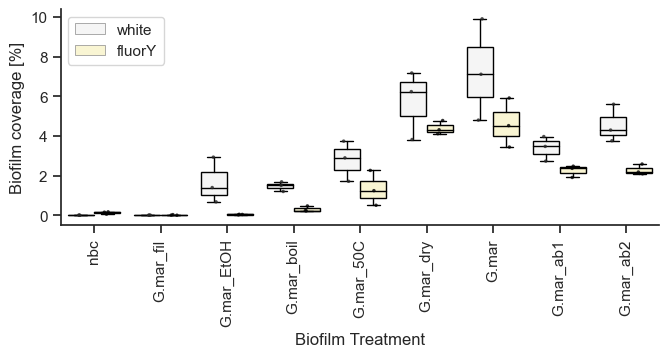

In [111]:
#Plot algal biofilm density according to species, for supplementary figure

#import biofilm density data
df3 = pd.read_csv("C:/Users/ew509/OneDrive - University of Exeter/LIZ_LAB/Projects/Diatoms-Platynereis/Species-Specificity/Gmarina_antibiotics_filtrate_experiment_round2_biofilm_density_testFig4.csv")
print(df3)
df3.head()
df3.info()

#Make a neutral palette
# color palette as dictionary
mypalette = {"white":"whitesmoke", "fluorY":"lemonchiffon"}

#Define specific properties of boxplot, so that lines and whiskers on boxes are black
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

plt.figure(figsize=(7,3))
#ax=sns.boxplot(data=df3, x="Abbreviation", y="diatom_%area", hue="Group", linewidth=1, palette="hls", dodge=False, fliersize=0)

# Draw a nested boxplot to show %larval settlement of those still alive by algae species and time
grped_bplot = sns.catplot(x="Abbreviation", y="diatom_%area",
            hue="Light filter", kind="box", legend=False, height=3, aspect=2.3, palette=mypalette,
            data=df3, order=newranks["Abbreviation"], linewidth=1.0, fliersize=0, **PROPS)


sns.despine()

plt.xticks(rotation=90)

grped_bplot = sns.stripplot(x='Abbreviation', 
                            y='diatom_%area', 
                            hue='Light filter',
                            jitter=True,
                            dodge=True, 
                            marker='o', 
                            palette='dark:black',
                            alpha=0.8,
                            size=2.5,
                            data=df3, order=newranks["Abbreviation"])


# how to remove redundant legends in Python
# Let us first get legend information from the plot object
handles, labels = grped_bplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:2], labels[0:2], loc='upper left')
plt.ylabel("Biofilm coverage [%]")
plt.xlabel("Biofilm Treatment")
#Export graph to an svg file for use in figure 
plt.savefig("/output/SuppFig4a.svg", bbox_inches='tight')

In [112]:
#make a dataframe with median values for each 'Abbreviation' group (ie each species median % settlement)
median_vals24 = df[df["Time after induction (h)"] == 24].groupby("Abbreviation")["%_settlement_alive"].median()
list_median_vals24 = median_vals24.tolist()

median_vals48 = df[df["Time after induction (h)"] == 48].groupby("Abbreviation")["%_settlement_alive"].median()
list_median_vals48 = median_vals48.tolist()

whitelight=df3.loc[df3["Light filter"]=='white'] 
fluorlight=df3.loc[df3["Light filter"]=='fluorY']

median_biofilm_white=whitelight.groupby("Abbreviation")["diatom_%area"].median()
list_median_biofilm_white = median_biofilm_white.tolist()

median_biofilm_yellow=fluorlight.groupby("Abbreviation")["diatom_%area"].median()
list_median_biofilm_yellow = median_biofilm_yellow.tolist()

names = ("G.mar", "G.mar50C", "G.mar_fil", "nbc", "G.mar_dry", "G.mar_boil", "G.mar_ab1", "G.mar_ab2", "G.mar_EtOH")

medians = pd.DataFrame(
    {'Abbreviation': names,
     'Median_%_settlement_24h': list_median_vals24,
     'Median_%_settlement_48h': list_median_vals48,
     'Median_%_biofilm_W': median_biofilm_white,
     'Median_%_biofilm_Y': median_biofilm_yellow
    })
print(medians)

             Abbreviation  Median_%_settlement_24h  Median_%_settlement_48h  \
Abbreviation                                                                  
G.mar               G.mar                37.268519                67.948718   
G.mar_50C        G.mar50C                26.928571                22.578348   
G.mar_EtOH      G.mar_fil                10.529557                22.783251   
G.mar_ab1             nbc                49.936143                75.369458   
G.mar_ab2       G.mar_dry                42.118227                72.685185   
G.mar_boil     G.mar_boil                21.328225                20.689655   
G.mar_dry       G.mar_ab1                42.857143                13.357143   
G.mar_fil       G.mar_ab2                 5.489418                 3.448276   
nbc            G.mar_EtOH                 6.083333                 7.208995   

              Median_%_biofilm_W  Median_%_biofilm_Y  
Abbreviation                                          
G.mar               

In [113]:
#For checking correlation of algal density to % settlement, we should use a data subset that excludes the no biofilm control measurements (nbc)

# Filter all rows of dataframe 'medians' for which the median % biofilm is >1%
df_filtered = medians[medians['Median_%_biofilm_W'] > 0.0095]
 # Print the new dataframe
print(df_filtered.head())
 # Print the shape of the dataframe
print(df_filtered.shape)

#Check correlation between % larval settlement and % algal density with Pearson correlation test.

import numpy as np
import scipy.stats

#Run a Kendall's tau correlation test, a non-parametric test.           
tau24 = scipy.stats.kendalltau(df_filtered["Median_%_settlement_24h"], df_filtered["Median_%_biofilm_W"])  
print(tau24)
# Kendall's tau statistic==-0.05555555555555555, pvalue=0.919455467372134

tau48 = scipy.stats.kendalltau(df_filtered["Median_%_settlement_48h"], df_filtered["Median_%_biofilm_W"])  
print(tau48)
# Kendall's tau statistic=0.2777777777777778, pvalue=0.35848765432098767

#Run a Kendall's tau correlation test, a non-parametric test.           
tau24y = scipy.stats.kendalltau(df_filtered["Median_%_settlement_24h"], df_filtered["Median_%_biofilm_Y"])  
print(tau24y)
# Kendall's tau statistic==-0.05555555555555555, pvalue=0.919455467372134

tau48y = scipy.stats.kendalltau(df_filtered["Median_%_settlement_48h"], df_filtered["Median_%_biofilm_Y"])  
print(tau48y)

#Result: there is no significant correlation between biofilm density and % larval settlement at 24 but not 48h. p-value cutoff 0.05
#There is a strong pos correlation at 24h with all cell coverage(white) and a very strong pos correlation with live cell coverage (fluorY)
#according to recommendations/classification by Schober, Boer & Schwarte (2018)
#https://blogs.sas.com/content/iml/2023/04/05/interpret-spearman-kendall-corr.html


             Abbreviation  Median_%_settlement_24h  Median_%_settlement_48h  \
Abbreviation                                                                  
G.mar               G.mar                37.268519                67.948718   
G.mar_50C        G.mar50C                26.928571                22.578348   
G.mar_EtOH      G.mar_fil                10.529557                22.783251   
G.mar_ab1             nbc                49.936143                75.369458   
G.mar_ab2       G.mar_dry                42.118227                72.685185   

              Median_%_biofilm_W  Median_%_biofilm_Y  
Abbreviation                                          
G.mar                      7.106               4.519  
G.mar_50C                  2.897               1.245  
G.mar_EtOH                 1.401               0.046  
G.mar_ab1                  3.472               2.367  
G.mar_ab2                  4.296               2.183  
(8, 5)
SignificanceResult(statistic=0.6428571428571428, pvalu

In [114]:
#Import data for larval settlement at different ages of induction. This could be a fig4C?
#import biofilm density data
df4 = pd.read_csv("../data/LarvalAge_Gmarina_Experiment_Results_Fig4.csv")
print(df4)
df4.head()
df4.info()

           Date Age at induction  #_coverslip  #_crawl  #_swim  #_dead  \
0    12/07/2022             8dpf           19        6       5       0   
1    12/07/2022             8dpf           24        4       2       0   
2    12/07/2022             8dpf           28        2       0       0   
3    12/07/2022             8dpf           26        0       4       0   
4    12/07/2022             8dpf           24        4       2       0   
..          ...              ...          ...      ...     ...     ...   
157  12/07/2022             2dpf            2        1      27       0   
158  12/07/2022             2dpf            5        3      18       4   
159  12/07/2022             2dpf            4        6      18       2   
160  12/07/2022             2dpf            1       11      16       2   
161  12/07/2022             2dpf            3        7      20       0   

     Time after induction [h] Abbreviation  %_settlement_total  \
0                           4            8   

In [115]:
#Run a Shapiro-Wilks test on data to check distribution
#import libraries needed
import numpy as np
from scipy.stats import shapiro
from numpy.random import random

#Conduct the Shapiro-Wilk Test
shapiro(df4["%_settlement_alive"])
#The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05. We can state with 95% confidence that the data does NOT fit the normal distribution.

ShapiroResult(statistic=0.8919269442558289, pvalue=1.6794701185318672e-09)

In [116]:
#make a subset of df where time=4 h after induction
subset4 = df4.loc[df4["Time after induction [h]"]==4]

#make a subset of df where time=24 h after induction
subset24 = df4.loc[df4["Time after induction [h]"]==24]

#make a subset of df where time=48 h after induction
subset48 = df4.loc[df4["Time after induction [h]"]==48]

#Run a Shapiro-Wilks test on data to check distribution

#Conduct the Shapiro-Wilk Test
shapiroresult4 = shapiro(subset4["%_settlement_alive"])
#The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05. We can state with 95% confidence that the data does NOT fit the normal distribution.

#Conduct the Shapiro-Wilk Test
shapiroresult24 = shapiro(subset24["%_settlement_alive"])

#Conduct the Shapiro-Wilk Test
shapiroresult48 = shapiro(subset48["%_settlement_alive"])

print(shapiroresult4)
print(shapiroresult24)
print(shapiroresult48)

ShapiroResult(statistic=0.8806157112121582, pvalue=6.49778958177194e-05)
ShapiroResult(statistic=0.868804395198822, pvalue=2.804905489028897e-05)
ShapiroResult(statistic=0.8750542402267456, pvalue=4.352988617029041e-05)


In [117]:
#We want to know if each species of microlgae used causes significantly more settlement than control, after 24 and 48h.
#We will do Mann-Whitney U rank test on each treatment vs control to check for p-value <0.05, at 24 and 48h.

from scipy import stats

#test subsetting the data correctly for 4h 8 days control and other ages of larvae
print(df4["%_settlement_alive"][(df4['Time after induction [h]']==4) & (df4['Age at induction'] == "8dpf_control_slip")])
print(np.unique(df4['Age at induction']))

#make a dictionary called 'p-values' and output into it the results of a Mann-Whitney U test on each larval age at induction vs control, 24h
p_values4= {}
ctrl_data4 = df4["%_settlement_alive"][(df4['Time after induction [h]']==4) & (df4['Age at induction'] == "8dpf_control_slip")]
for age in np.unique(df4['Age at induction']):
    test_data4 = df4["%_settlement_alive"][(df4['Time after induction [h]']==4) & (df4['Age at induction'] == age)]
    print(age)
    res4 = stats.mannwhitneyu(ctrl_data4, test_data4)
    print(res4)
    p_values4[age] = res4[1]

#make a dictionary called 'p-values-age-24' and output into it the results of a Mann-Whitney U test on each age of larvae vs 8 days control, 24h
p_values_age24= {}
ctrl_data_age24 = df4["%_settlement_alive"][(df4['Time after induction [h]']==24) & (df4['Age at induction'] == "8dpf_control_slip")]
for age in np.unique(df4['Age at induction']):
    test_data_age24 = df4["%_settlement_alive"][(df4['Time after induction [h]']==24) & (df4['Age at induction'] == age)]
    print(age)
    res_age24 = stats.mannwhitneyu(ctrl_data_age24, test_data_age24)
    print(res_age24)
    p_values_age24[age] = res_age24[1]
    
#make a dictionary called 'p-values-age-48' and output into it the results of a Mann-Whitney U test on each age of larvae vs 8 days control, 48h
p_values_age48= {}
ctrl_data_age48 = df4["%_settlement_alive"][(df4['Time after induction [h]']==48) & (df4['Age at induction'] == "8dpf_control_slip")]
for age in np.unique(df4['Age at induction']):
    test_data_age48 = df4["%_settlement_alive"][(df4['Time after induction [h]']==48) & (df4['Age at induction'] == age)]
    print(age)
    res_age48 = stats.mannwhitneyu(ctrl_data_age48, test_data_age48)
    print(res_age48)
    p_values_age48[age] = res_age48[1]
    
#combine the two dictionaries for 24 and 48h into one dictionary
def mergeDictionary(p_values4, p_values_age24, p_values_age48):
   dict_age_424 = {**p_values4, **p_values_age24, **p_values_age48}
   for key, value in dict_age_424.items():
       if key in p_values4 and key in p_values_age24 and key in p_values_age48:
               dict_age_424[key] = [value , p_values_age24[key], p_values4[key],]
   return dict_age_424

dict_age_424 = mergeDictionary(p_values_age48, p_values_age24, p_values4)
print(dict_age_424)

#make a dataframe from this dictionary
age_results = pd.DataFrame.from_dict(dict_age_424, orient='index',
                       columns=['4h p-value', '24h p-value', '48h p-value'])
age_results_sorted = age_results.sort_values(by='48h p-value', ascending=False)
age_results_html = age_results_sorted.style.set_caption('Table S1. Mann-Whitney U rank test p-values for different ages of larvae vs 8 days negative control')
age_results_sorted.style
print(age_results_sorted)

#Save to file
age_results_sorted.to_csv("../output/SuppTable_for_fig4c.csv")
age_results_html.to_html("../output/SuppTable_for_fig4c.html")


6      0.000000
7      6.666667
8     10.000000
9      3.333333
10    10.000000
11    29.729730
Name: %_settlement_alive, dtype: float64
['2dpf' '3.5dpf' '3dpf' '4dpf' '5dpf' '6dpf' '7dpf' '8dpf'
 '8dpf_control_slip']
2dpf
MannwhitneyuResult(statistic=15.0, pvalue=0.6873627164487798)
3.5dpf
MannwhitneyuResult(statistic=12.0, pvalue=0.366480429331709)
3dpf
MannwhitneyuResult(statistic=10.0, pvalue=0.22649054028251026)
4dpf
MannwhitneyuResult(statistic=3.0, pvalue=0.020022386750866865)
5dpf
MannwhitneyuResult(statistic=1.0, pvalue=0.008015850513029913)
6dpf
MannwhitneyuResult(statistic=0.0, pvalue=0.004998124765082457)
7dpf
MannwhitneyuResult(statistic=0.0, pvalue=0.00492203567532315)
8dpf
MannwhitneyuResult(statistic=0.0, pvalue=0.0048466012104884885)
8dpf_control_slip
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
2dpf
MannwhitneyuResult(statistic=11.0, pvalue=0.28584403374200407)
3.5dpf
MannwhitneyuResult(statistic=0.0, pvalue=0.004624228801499123)
3dpf
MannwhitneyuResult(statistic=0.

In [118]:
#generate a colour palette to colour graphs depending on p-value of Mann Whitney U test at 4h % settlement             
custom_palette4 = []
for value in age_results_sorted['4h p-value']:
    if value < 0.00625:
        custom_palette4.append('steelblue')
    elif (value > 0.00625) and (value < 0.05):
        custom_palette4.append('lightblue')
    else:
        custom_palette4.append('darkgrey')
print(custom_palette4)
age_list=('8dpf_control_slip', '2dpf', '3.5dpf', '3dpf', '6dpf', '7dpf', '8dpf', '4dpf', '5dpf')
print(age_list)

dictionary_age4 = dict(zip(age_list, custom_palette4))
print(dictionary_age4)

#generate a colour palette to colour graphs depending on p-value of Mann Whitney U test at 24h % settlement             
custom_palette24 = []
for value in age_results_sorted['24h p-value']:
    if value < 0.00625:
        custom_palette24.append('steelblue')
    elif (value > 0.00625) and (value < 0.05):
        custom_palette24.append('lightblue')
    else:
        custom_palette24.append('darkgrey')
print(custom_palette24)

dictionary_age24 = dict(zip(age_list, custom_palette24))
print(dictionary_age24)

#generate a colour palette to colour graphs depending on p-value of Mann Whitney U test at 48h % settlement             
custom_palette48 = []
for value in age_results_sorted['48h p-value']:
    if value < 0.00625:
        custom_palette48.append('steelblue')
    elif (value > 0.00625) and (value < 0.05):
        custom_palette48.append('lightblue')
    else:
        custom_palette48.append('darkgray')
print(custom_palette48)

dictionary_age48 = dict(zip(age_list, custom_palette48))
print(dictionary_age48)

['darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'steelblue', 'steelblue', 'steelblue', 'lightblue', 'lightblue']
('8dpf_control_slip', '2dpf', '3.5dpf', '3dpf', '6dpf', '7dpf', '8dpf', '4dpf', '5dpf')
{'8dpf_control_slip': 'darkgrey', '2dpf': 'darkgrey', '3.5dpf': 'darkgrey', '3dpf': 'darkgrey', '6dpf': 'steelblue', '7dpf': 'steelblue', '8dpf': 'steelblue', '4dpf': 'lightblue', '5dpf': 'lightblue'}
['darkgrey', 'darkgrey', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue']
{'8dpf_control_slip': 'darkgrey', '2dpf': 'darkgrey', '3.5dpf': 'steelblue', '3dpf': 'steelblue', '6dpf': 'steelblue', '7dpf': 'steelblue', '8dpf': 'steelblue', '4dpf': 'steelblue', '5dpf': 'steelblue'}
['darkgray', 'darkgray', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue']
{'8dpf_control_slip': 'darkgray', '2dpf': 'darkgray', '3.5dpf': 'steelblue', '3dpf': 'steelblue', '6dpf': 'steelblue', '7dpf': 'steelblue', '8dpf': 'steelblue', '

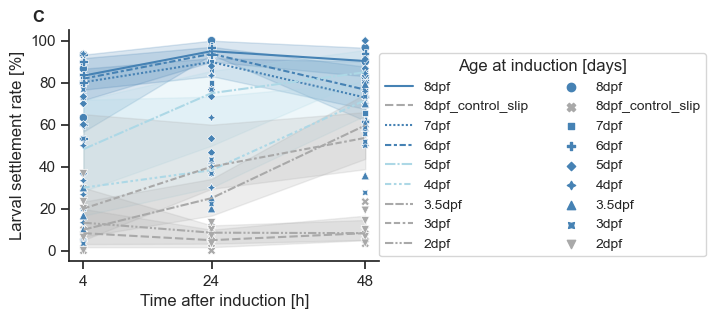

<Figure size 640x480 with 0 Axes>

In [119]:
plt.figure(figsize=(4, 3))

test=sns.lineplot(data=df4, x="Time after induction [h]", y="%_settlement_alive", hue="Age at induction", 
                  style="Age at induction", palette=dictionary_age4, estimator=np.median)
test=sns.scatterplot(data=df4, x="Time after induction [h]", y="%_settlement_alive", marker='o', 
                     hue="Age at induction",style="Age at induction", alpha=1,
                    palette=dictionary_age24)

sns.despine()
#Set points for x axis
test.set_xticks([4, 24, 48])
test.set_title('C', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(-0.1,0)})
plt.legend(bbox_to_anchor=(1, 0.9), title='Age at induction [days]', loc='upper left', ncol=2, borderaxespad=0, fontsize=10)
test.set_ylabel("Larval settlement rate [%]", fontsize=12)
test.set_xlabel("Time after induction [h]", fontsize=12)

plt.show()
plt.tight_layout()

fig = test.get_figure()
#Export graph to svg file
fig.savefig("../output/Species-Specificity/Figure4C.svg", bbox_inches='tight')

In [120]:
# Create an additional column '%_dead' after converting the existing '#_dead' column into a percentage of total larvae 
#also same for 48h, and % alive as well.  
# create a new column
df4['%_dead'] = df4["#_dead"] / (df4["#_coverslip"] + df4["#_crawl"] + df4["#_swim"] + df4["#_dead"]) * 100


df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      162 non-null    object 
 1   Age at induction          162 non-null    object 
 2   #_coverslip               162 non-null    int64  
 3   #_crawl                   162 non-null    int64  
 4   #_swim                    162 non-null    int64  
 5   #_dead                    162 non-null    int64  
 6   Time after induction [h]  162 non-null    int64  
 7   Abbreviation              162 non-null    object 
 8   %_settlement_total        162 non-null    float64
 9   %_settlement_alive        162 non-null    float64
 10  %_dead                    162 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 14.0+ KB


In [121]:
#We want to know if each type of biofilm used causes significantly more death than control, after 24 and 48h.
#We will do Mann-Whitney U rank test on each treatment vs control to check for p-value <0.05, at 24 and 48h.

from scipy import stats

#test subsetting the data correctly for 4h 8 days control and other ages of larvae
print(df4["%_dead"][(df4['Time after induction [h]']==4) & (df4['Age at induction'] == "8dpf_control_slip")])
print(np.unique(df4['Age at induction']))

#make a dictionary called 'p-values' and output into it the results of a Mann-Whitney U test on each larval age at induction vs control, 24h
p_valuesd4= {}
ctrl_datad4 = df4["%_dead"][(df4['Time after induction [h]']==4) & (df4['Age at induction'] == "8dpf_control_slip")]
for age in np.unique(df4['Age at induction']):
    test_datad4 = df4["%_dead"][(df4['Time after induction [h]']==4) & (df4['Age at induction'] == age)]
    print(age)
    resd4 = stats.mannwhitneyu(ctrl_datad4, test_datad4)
    print(resd4)
    p_valuesd4[age] = resd4[1]

#make a dictionary called 'p-values-age-24' and output into it the results of a Mann-Whitney U test on each age of larvae vs 8 days control, 24h
p_values_aged24= {}
ctrl_data_aged24 = df4["%_dead"][(df4['Time after induction [h]']==24) & (df4['Age at induction'] == "8dpf_control_slip")]
for age in np.unique(df4['Age at induction']):
    test_data_aged24 = df4["%_dead"][(df4['Time after induction [h]']==24) & (df4['Age at induction'] == age)]
    print(age)
    res_aged24 = stats.mannwhitneyu(ctrl_data_aged24, test_data_aged24)
    print(res_aged24)
    p_values_aged24[age] = res_aged24[1]
    
#make a dictionary called 'p-values-age-48' and output into it the results of a Mann-Whitney U test on each age of larvae vs 8 days control, 48h
p_values_aged48= {}
ctrl_data_aged48 = df4["%_dead"][(df4['Time after induction [h]']==48) & (df4['Age at induction'] == "8dpf_control_slip")]
for age in np.unique(df4['Age at induction']):
    test_data_aged48 = df4["%_dead"][(df4['Time after induction [h]']==48) & (df4['Age at induction'] == age)]
    print(age)
    res_aged48 = stats.mannwhitneyu(ctrl_data_aged48, test_data_aged48)
    print(res_aged48)
    p_values_aged48[age] = res_aged48[1]
    
#combine the three dictionaries for 4 and 24 and 48h into one dictionary
def mergeDictionary(p_valuesd4, p_values_aged24, p_values_aged48):
   dict_dead_424 = {**p_valuesd4, **p_values_aged24, **p_values_aged48}
   for key, value in dict_dead_424.items():
       if key in p_valuesd4 and key in p_values_aged24 and key in p_values_aged48:
               dict_dead_424[key] = [value , p_values_aged24[key], p_valuesd4[key],]
   return dict_dead_424

dict_dead_424 = mergeDictionary(p_values_aged48, p_values_aged24, p_valuesd4)
print(dict_dead_424)

#make a dataframe from this dictionary
dead_results = pd.DataFrame.from_dict(dict_dead_424, orient='index',
                       columns=['4h p-value', '24h p-value', '48h p-value'])
dead_results_sorted = dead_results.sort_values(by='48h p-value', ascending=False)
dead_results_html = dead_results_sorted.style.set_caption('Table S1. Mann-Whitney U rank test p-values for death of different ages of larvae vs 8 days negative control')
dead_results_sorted.style
print(dead_results_sorted)

#Save to file
dead_results_sorted.to_csv("../output/SuppTable_for_fig4c2.csv")
dead_results_html.to_html("../output/SuppTable_for_fig4c2.html")


6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
Name: %_dead, dtype: float64
['2dpf' '3.5dpf' '3dpf' '4dpf' '5dpf' '6dpf' '7dpf' '8dpf'
 '8dpf_control_slip']
2dpf
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
3.5dpf
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
3dpf
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
4dpf
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
5dpf
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
6dpf
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
7dpf
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
8dpf
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
8dpf_control_slip
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
2dpf
MannwhitneyuResult(statistic=15.0, pvalue=0.40465676192728617)
3.5dpf
MannwhitneyuResult(statistic=12.0, pvalue=0.17394501679990915)
3dpf
MannwhitneyuResult(statistic=15.0, pvalue=0.40465676192728617)
4dpf
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
5dpf
MannwhitneyuResult(statistic=18.0, pvalue=1.0)
6dpf
MannwhitneyuResult(statistic=18.

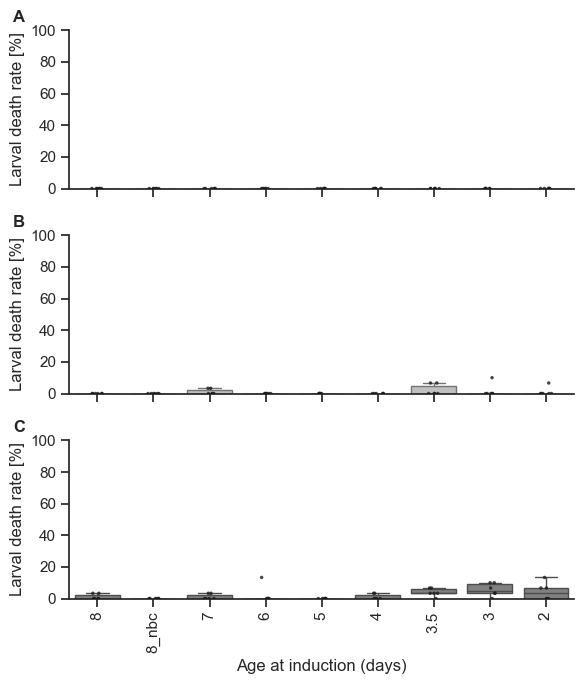

In [122]:
#Make a neutral palette
# color palette as dictionary
mypalette = {4:"whitesmoke", 24:"silver", 48:"gray"}

#Define specific properties of boxplot, so that lines and whiskers on boxes are black
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}


#make a subset of df where time=24 h after induction
subset_age4 = df4.loc[df4["Time after induction [h]"]==4]

#make a subset of df where time=24 h after induction
subset_age24 = df4.loc[df4["Time after induction [h]"]==24]

#make a subset of df where time=48 h after induction
subset_age48 = df4.loc[df4["Time after induction [h]"]==48]

#Try to plot the same data, but split the 24 & 48h data into two separate graphs, one on top of the other.
fig, axes = plt.subplots(3, 1, figsize=(6, 7))
sns.despine()


#% dead at 4h after induction
plot1 = sns.boxplot(ax=axes[0], data=subset_age4, x="Abbreviation", y="%_dead", linewidth=1.0, color="whitesmoke", fliersize=0)
plot1 = sns.stripplot(ax=axes[0], data=subset_age4, x='Abbreviation', y="%_dead", jitter=True, dodge=True, marker='o', alpha=0.8, size=2.5, color="k")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
plot1.set_ylabel("Larval death rate [%]")
plot1.set_ylim(0, 100)
plot1.set(xticklabels=[]) 
plot1.set(xlabel=None)
plot1.set_title('A', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(-0.1,0)})

#% dead at 24h after induction
plot2 = sns.boxplot(ax=axes[1], data=subset_age24, x="Abbreviation", y="%_dead", linewidth=1.0, color="silver", fliersize=0)
plot2 = sns.stripplot(ax=axes[1], data=subset_age24, x='Abbreviation', y="%_dead", jitter=True, dodge=True, marker='o', alpha=0.8, size=2.5, color="k")
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90)
plot2.set_ylabel("Larval death rate [%]")
plot2.set_ylim(0, 100)
plot2.set(xticklabels=[]) 
plot2.set(xlabel=None)
plot2.set_title('B', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(-0.1,0)})

#% dead at 48h after induction
plot3 = sns.boxplot(ax=axes[2], data=subset_age48, x="Abbreviation", y="%_dead", linewidth=1.0, color="gray", fliersize=0)
plot3 = sns.stripplot(ax=axes[2], data=subset_age48, x='Abbreviation', y="%_dead", jitter=True, dodge=True, marker='o', alpha=0.8, size=2.5, color="k")
plot3.set_xticklabels(plot3.get_xticklabels(), rotation=90)
plot3.set_ylabel("Larval death rate [%]")
plot3.set_ylim(0, 100)
plt.xlabel("Age at induction (days)")
plot3.set_title('C', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(-0.1,0)})

plt.tight_layout()
sns.set_theme(style="ticks")

#Export graph to an svg file for use in figure 
plt.savefig("..'output', bbox_inches='tight')

In [123]:
#do Kruskal-Wallis Test to check if significant difference between different groups at timepoint 4hpf.. 
#Shapiro-Wilks test suggests data is not normally distributed.
#We are interest in 'Abbreviation', We will compare the larval settlement response when larvae are
#at different ages of induction.
import scipy.stats as stats

kruskalgroup4=stats.kruskal(subset4["%_settlement_alive"][subset4["Abbreviation"] == "8_nbc"],
               subset4["%_settlement_alive"][subset4["Abbreviation"] == "8"],
                subset4["%_settlement_alive"][subset4["Abbreviation"] == "7"],
                subset4["%_settlement_alive"][subset4["Abbreviation"] == "6"],
                subset4["%_settlement_alive"][subset4["Abbreviation"] == "5"],
                subset4["%_settlement_alive"][subset4["Abbreviation"] == "4"],
                subset4["%_settlement_alive"][subset4["Abbreviation"] == "3.5"],
                subset4["%_settlement_alive"][subset4["Abbreviation"] == "3"],
                subset4["%_settlement_alive"][subset4["Abbreviation"] == "2"])
print(kruskalgroup4)

#perform Dunn's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp

datagroup4 = [subset4["%_settlement_alive"][subset4["Abbreviation"] == "8_nbc"], 
             subset4["%_settlement_alive"][subset4["Abbreviation"] == "8"], 
             subset4["%_settlement_alive"][subset4["Abbreviation"] == "7"], 
             subset4["%_settlement_alive"][subset4["Abbreviation"] == "6"], 
             subset4["%_settlement_alive"][subset4["Abbreviation"] == "5"], 
             subset4["%_settlement_alive"][subset4["Abbreviation"] == "4"], 
             subset4["%_settlement_alive"][subset4["Abbreviation"] == "3.5"], 
             subset4["%_settlement_alive"][subset4["Abbreviation"] == "3"], 
             subset4["%_settlement_alive"][subset4["Abbreviation"] == "2"]]

p_values4 = sp.posthoc_dunn(datagroup4, p_adjust = 'bonferroni')
print(p_values4)

p_values4 < 0.00625

#KruskalResult(statistic=37.35428218168834, pvalue=9.90422627124787e-06)
#results shows biofilm chemistry is important for settlement at 24h,
#only 8d larvae signifantly different than control using Bonferroni correction.
#6-8day larvae significantly different than control with p0.05 cutoff, but not different from each other.


KruskalResult(statistic=37.35428218168834, pvalue=9.90422627124787e-06)
          1         2         3         4         5    6         7         8  \
1  1.000000  0.004408  0.008537  0.013540  0.987183  1.0  1.000000  1.000000   
2  0.004408  1.000000  1.000000  1.000000  1.000000  1.0  0.018487  0.198601   
3  0.008537  1.000000  1.000000  1.000000  1.000000  1.0  0.033804  0.326147   
4  0.013540  1.000000  1.000000  1.000000  1.000000  1.0  0.051444  0.459444   
5  0.987183  1.000000  1.000000  1.000000  1.000000  1.0  1.000000  1.000000   
6  1.000000  1.000000  1.000000  1.000000  1.000000  1.0  1.000000  1.000000   
7  1.000000  0.018487  0.033804  0.051444  1.000000  1.0  1.000000  1.000000   
8  1.000000  0.198601  0.326147  0.459444  1.000000  1.0  1.000000  1.000000   
9  1.000000  0.020480  0.037288  0.056571  1.000000  1.0  1.000000  1.000000   

          9  
1  1.000000  
2  0.020480  
3  0.037288  
4  0.056571  
5  1.000000  
6  1.000000  
7  1.000000  
8  1.000000  
9

,1,2,3,4,5,6,7,8,9
1,False,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [124]:
kruskalgroup24=stats.kruskal(subset24["%_settlement_alive"][subset24["Abbreviation"] == "8_nbc"],
               subset24["%_settlement_alive"][subset24["Abbreviation"] == "8"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "7"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "6"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "5"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "4"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "3.5"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "3"],
                subset24["%_settlement_alive"][subset24["Abbreviation"] == "2"])
print(kruskalgroup24)

#perform Dunn's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp

datagroup24 = [subset24["%_settlement_alive"][subset24["Abbreviation"] == "8_nbc"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "8"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "7"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "6"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "5"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "4"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "3.5"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "3"], 
             subset24["%_settlement_alive"][subset24["Abbreviation"] == "2"]]

p_values24 = sp.posthoc_dunn(datagroup24, p_adjust = 'bonferroni')
print(p_values24)

p_values24 < 0.00625

#KruskalResult(statistic=49.13663967611333, pvalue=5.98562800058903e-08)
#results shows biofilm chemistry is important for settlement at 24h,
#6-8d larvae signifantly different than control using Bonferroni correction.


KruskalResult(statistic=49.13663967611333, pvalue=5.98562800058903e-08)
          1         2         3         4         5         6         7  \
1  1.000000  0.000111  0.005359  0.000074  0.105267  1.000000  1.000000   
2  0.000111  1.000000  1.000000  1.000000  1.000000  0.461354  0.028867   
3  0.005359  1.000000  1.000000  1.000000  1.000000  1.000000  0.473409   
4  0.000074  1.000000  1.000000  1.000000  1.000000  0.364517  0.021347   
5  0.105267  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
6  1.000000  0.461354  1.000000  0.364517  1.000000  1.000000  1.000000   
7  1.000000  0.028867  0.473409  0.021347  1.000000  1.000000  1.000000   
8  1.000000  0.318937  1.000000  0.249555  1.000000  1.000000  1.000000   
9  1.000000  0.000391  0.015151  0.000266  0.242750  1.000000  1.000000   

          8         9  
1  1.000000  1.000000  
2  0.318937  0.000391  
3  1.000000  0.015151  
4  0.249555  0.000266  
5  1.000000  0.242750  
6  1.000000  1.000000  
7  1.0000

,1,2,3,4,5,6,7,8,9
1,False,True,True,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,True,False,True,False,False,False,False,False


In [125]:
kruskalgroup48=stats.kruskal(subset48["%_settlement_alive"][subset48["Abbreviation"] == "8_nbc"],
               subset48["%_settlement_alive"][subset48["Abbreviation"] == "8"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "7"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "6"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "5"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "4"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "3.5"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "3"],
                subset48["%_settlement_alive"][subset48["Abbreviation"] == "2"])
print(kruskalgroup48)

#perform Dunn's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp

datagroup48 = [subset48["%_settlement_alive"][subset48["Abbreviation"] == "8_nbc"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "8"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "7"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "6"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "5"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "4"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "3.5"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "3"], 
             subset48["%_settlement_alive"][subset48["Abbreviation"] == "2"]]

p_values48 = sp.posthoc_dunn(datagroup48, p_adjust = 'bonferroni')
print(p_values48)

p_values48 < 0.00625

#KruskalResult(statistic=43.15438743828571, pvalue=8.215349113131247e-07)
#results shows biofilm chemistry is important for settlement at 24h,
#8d and 5d larvae signifantly different than control using Bonferroni correction.


KruskalResult(statistic=43.15438743828571, pvalue=8.215349113131247e-07)
          1         2         3         4         5         6         7  \
1  1.000000  0.000268  0.058926  0.071050  0.000735  0.217656  1.000000   
2  0.000268  1.000000  1.000000  1.000000  1.000000  1.000000  0.271585   
3  0.058926  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4  0.071050  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
5  0.000735  1.000000  1.000000  1.000000  1.000000  1.000000  0.512191   
6  0.217656  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
7  1.000000  0.271585  1.000000  1.000000  0.512191  1.000000  1.000000   
8  1.000000  0.077935  1.000000  1.000000  0.159243  1.000000  1.000000   
9  1.000000  0.000318  0.066775  0.080363  0.000866  0.243281  1.000000   

          8         9  
1  1.000000  1.000000  
2  0.077935  0.000318  
3  1.000000  0.066775  
4  1.000000  0.080363  
5  0.159243  0.000866  
6  1.000000  0.243281  
7  1.000

,1,2,3,4,5,6,7,8,9
1,False,True,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,True,False,False,True,False,False,False,False
